## Python For Machine Learning Fall 2025
---
# Linear Regression



**09/28 This version is modified to include a few new examples**


### 1. Introduction
Linear regression is one of the simplest supervised learning algorithms. In fact, it is so simple that it is sometimes not considered machine learning at all! Whatever you believe, the fact is that linear regression--and its extensions--continues to be a common and useful method of making predictions when the target vector is a quantitative value (e.g. home price, age)

#### 1.1 Early Concepts and the Method of Least Squares

The true birth of linear regression is tied to the development of the method of least squares. While several brilliant minds worked on similar problems, two figures are most prominently credited with its creation in the early 19th century.

- Adrien-Marie Legendre: the first to publish the method of least squares in 1805
- Carl Friedrich Gauss: Gauss claimed he had been using the method since 1795 but didn't publish it until 1809

#### 1.2 Regression

In the 1880s, Sir Francis Galton was studying the relationship between the heights of parents and their children. He observed that very tall parents tended to have children who were tall, but slightly shorter than them. Similarly, very short parents tended to have children who were short, but slightly taller than them.

He called this phenomenon "regression towards mediocrity," which was later termed "regression to the mean." He developed a graphical method to describe this relationship, plotting the parents' heights against the children's heights and drawing a line through the data. He used the term "regression line" to describe this relationship. This is where the name of the technique comes from, even though today its primary use is for prediction, not just describing this specific biological phenomenon.

#### 1.3 Problem Statement
You want to train a model that represents a linear relationship between the feature and target vector.

#### 1.4 Solution
Use a linear regression (`LinearRegression` in scikit-learn)

In [1]:
# load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# generate feature matrix, target vector
features, target = make_regression(n_samples=100, n_features=3, n_informative=3, random_state=1)

# create linear regression
regression = LinearRegression()

# fit the linear regression
model = regression.fit(features, target)

#### 1.5 Code Interpretation

The script uses `scikit-learn` library to perform three main steps:

- Generate a synthetic dataset suitable for a regression problem.
- Create an instance of a linear regression model.
- Train (or "fit") the model to the generated data.

##### 1.5.1 Generating Data
`features, target = make_regression(n_samples=100, n_features=3, n_informative=3, random_state=1)`

This line calls the make_regression function to create our dataset.

`n_samples=100`: This specifies that we want `100` observations or rows in our dataset.

`n_features=3`: This means each sample will have `3` descriptive features (or columns).

`n_informative=3`: This tells the function that all `3` features should be "informative," meaning they all have a meaningful influence on the target value.

`random_state=1`: This is a seed for the random number generator. Using a specific random_state ensures that every time this code is run, the exact same "random" data is generated. This is crucial for getting reproducible results.

The function returns two things:

`features`: A matrix (like a table) with `100` rows and `3` columns. These are the independent variables.

`target`: A vector (a single column) with `100` values. This is the dependent variable that the model will learn to predict.

##### 1.5.2 Creating the Model
`regression = LinearRegression()`

This line creates an instance of the LinearRegression model. You can think of regression as a blank, untrained model object, ready to learn from data.

##### 1.5.3 Training the model

`model = regression.fit(features, target)`

This is the most critical step. The `.fit()` method is where the model training happens.

`regression.fit(features, target)`: The features and target data were passed to the fit method. The linear regression algorithm then analyzes this data to find the optimal coefficients (or weights) for the three features that best predict the target value. It essentially "learns" the mathematical relationship between the inputs (`features`) and the output (`target`).

The `model` now holds this trained object, which can be used to make predictions on new, unseen data.

### 2. Linear Regression Model

Linear regression assumes that the relationship between the features and the target vector is approximately linear. That is, the effect (also called coefficient, weight, or parameter) of the features on the target vector is constant. In the solution above, for the sake of explanation, the model was trained using only three features. Thus, the model is as follows:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon
$$


#### 2.1 Coefficient and Intecept

In `sklearn`, the intercept $\beta_0$ is stored in the model's `intercept_` attribute.

In [2]:
model.intercept_

np.float64(-1.4210854715202004e-14)

Corospondingly, the coefficients (or weights) are stored in the model's `coef_` attribute

In [3]:
model.coef_

array([44.19042807, 98.97517077, 58.15774073])

#### 2.2 Make Predictions

With the model in hand, we are able to predict the target when given a new sample.

In [4]:
predictions = model.predict(features)
for pred, tar in zip(predictions, target):
    print(f"Prediction: {pred:.2f}, Target: {tar:.2f}, Error: {abs(pred-tar):.2f}")

Prediction: -10.38, Target: -10.38, Error: 0.00
Prediction: 25.51, Target: 25.51, Error: 0.00
Prediction: 19.68, Target: 19.68, Error: 0.00
Prediction: 149.50, Target: 149.50, Error: 0.00
Prediction: -121.65, Target: -121.65, Error: 0.00
Prediction: 90.29, Target: 90.29, Error: 0.00
Prediction: 214.01, Target: 214.01, Error: 0.00
Prediction: 224.74, Target: 224.74, Error: 0.00
Prediction: -73.17, Target: -73.17, Error: 0.00
Prediction: -195.63, Target: -195.63, Error: 0.00
Prediction: -52.49, Target: -52.49, Error: 0.00
Prediction: 201.80, Target: 201.80, Error: 0.00
Prediction: 20.27, Target: 20.27, Error: 0.00
Prediction: 89.16, Target: 89.16, Error: 0.00
Prediction: -4.44, Target: -4.44, Error: 0.00
Prediction: -45.48, Target: -45.48, Error: 0.00
Prediction: 56.90, Target: 56.90, Error: 0.00
Prediction: 120.55, Target: 120.55, Error: 0.00
Prediction: -66.22, Target: -66.22, Error: 0.00
Prediction: -43.84, Target: -43.84, Error: 0.00
Prediction: 34.29, Target: 34.29, Error: 0.00
Pred

#### 2.3 Evaluation using `score()`

`sklearn` provides `score()` function for more efficient evaluation. The `model.score(X, y)` method performs two main steps internally:

- It uses the input data `X` to generate predictions by calling the `model.predict(X)` method.

- It then compares these predictions against the true labels `y` and returns a single score based on a default metric.

The specific metric used depends on whether you are doing classification or regression.The function takes

In [5]:
model.score(features, target)

1.0

#### 2.4 Noise

Data in the real world is rarely perfect and almost always contains noise. As a result, a model's predictions won't align perfectly with observed values. In fact, it's completely normal for a model to have some degree of error.

The

In [6]:
# generate feature matrix, target vector
features, target = make_regression(n_samples=100, n_features=3, n_informative=3, noise=5, random_state=1)

# create linear regression
regression = LinearRegression()

# fit the linear regression
model = regression.fit(features, target)
model.score(features, target)

0.9982787415211123

The make_regression function first generates data based on a perfect linear relationship：
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3
$$

Here, vector $[\beta_0, \beta_1, \beta_2, \beta_3]$ represents the true coefficients (which can be obtained by setting the `coef` parameter to `True`). If the data were generated this way, all the points would fall perfectly on a straight line (or a hyperplane in higher dimensions).

However, real-world data always has noise. The noise parameter is used to simulate this imperfection. It adds random numbers to the perfect y values, drawn from a normal distribution (also called a Gaussian distribution) with a mean of `0` and a standard deviation equal to the value you specify.

### 3. Interaction Effect

An interaction effect (or simply "interaction") occurs when the effect of one independent variable on an outcome depends on the level or value of at least one other independent variable. In simpler terms, the variables don't work in isolation; their combined impact is different from the sum of their individual impacts.

#### 3.1 Simple Example

For example, imagine a simple coffee-based example where we have two binary features--the presence of sugar  and whether or not we have stirred-—and we want to predict if the coffee tastes sweet. Just putting sugar in the coffee (`sugar=1, stirred=0`) won't make the coffee taste sweet (all the sugar is at the bottom!) and just stirring the coffee without adding sugar (`sugar=0, stirred=1`) won't make it sweet either. Instead it is the interaction of putting sugar in the coffee and stirring the coffee (`sugar=1, stirred=1`) that will make a coffee taste sweet. The effects of sugar and stirred on sweetness are dependent on each other. In this case we say there is an interaction effect between the features sugar and stirred.

#### 3.2 Model the Interaction Effect

Now, let's generate a group of samples with higher noise. We can certainly expect the model performs poorly on the new dataset.

In [7]:
# generate feature matrix, target vector
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

features, targets = make_regression(n_samples = 100, n_features = 3, noise = 5)

# create linear regression
model = LinearRegression()


# fit the linear regression
model.fit(features, targets)
model.score(features, targets)



0.9934809005449953

Then we create the interaction term, as follows.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(
    degree=3, include_bias=False, interaction_only=True)

The parameters of the interaction term are as follows:
- `degree`
This parameter defines the maximum degree of the features to be created. Here, "degree" refers to the total number of features multiplied together in a single term.

- `interaction_only=False` (The default): This generates all feature combinations up to the specified degree, including powers of a single feature. For example, with $[x1, x2]$ and `degree=3`, it would generate $x_1$, $x_2$, $x_1^2$, $x_1\cdot x_2$, $x_2^2$, $x_1^3$, $x_1^2\cdot x_2$, $x_1\cdot x_2^2$, $x_2^3$.
- `interaction_only=True`: This generates only the products of different features (interaction terms) and will not generate powers of a single feature (like x1² or x1³). Its goal is purely to capture the "interaction" between features, not the non-linear relationship of a single feature with itself.
- `include_bias=True` (The default): This adds a column of all 1s as the first feature. This 1 corresponds to the constant term (the intercept) in a polynomial equation, equivalent to x_1
0
- `include_bias=False`: This does not add the column of all 1s.

The `.fit_transform(features)` method applies this rule to the original features.

In [9]:
features_interaction = interaction.fit_transform(features)
print(features_interaction.shape)

(100, 7)


Finally, a standard `LinearRegression` model is created and trained using the `.fit()` method. Crucially, it's trained on the enhanced feature matrix, `features_interaction`, which includes the interaction term, allowing the model to find the best coefficients for not just $x_1$ and $x_2$, but also for their product, $x_1\cdot x_2$.

In [10]:
regression = LinearRegression()

# Fit the linear regression
model = regression.fit(features_interaction, targets)
model.score(features_interaction, targets)

0.9940881465323307

### 4 Nonlinear Relationship

Although linear relationships are highly interpretable and practical, nonlinear relationships are more prevalent in reality. Consequently, polynomial fitting often yields superior results. As the most widely used machine learning library, `scikit-learn` inherently supports polynomial fitting.

#### 4.1 Creating Polynomial Features

In [11]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(
    degree=3,
    include_bias=False,
    interaction_only=False
)

features_polynomial = interaction.fit_transform(features)
print(features_polynomial.shape)


(100, 19)


#### 4.2 Model Training and Evaluation

In [12]:
regression = LinearRegression()

# fit the linear regression
model = regression.fit(features_polynomial, targets)
model.score(features_polynomial, targets)

0.9956629795898877

### 5. Overfitting
Although using higher-order polynomial features offers significant advantages over first-order features, a more powerful model is not always better in machine learning. There are two primary reasons for this: first, computational efficiency, as complex models are slower and require more space, and second, the tendency to overfit when training data is insufficient.

We will frequently deal with overfitting in this course. Here is a simple example.

In [13]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [14]:
# Generate simple linear data with noise
np.random.seed(73)
X, y, true_coefficient = make_regression(
    n_samples = 20,
    n_features = 1,
    noise = 5,
    coef = True)

In [15]:
# Define a simple linear model (the correct choice for this data)
linear_model = LinearRegression()

In [16]:
# A high-degree polynomial model that is too complex for this data
from sklearn.pipeline import make_pipeline
polynomial_model = make_pipeline(PolynomialFeatures(degree = 15), LinearRegression())

In [17]:
# Train the models
linear_model.fit(X, y)
polynomial_model.fit(X, y)
print(linear_model.score(X, y))
print(polynomial_model.score(X, y))

0.09122742978539222
0.6344237680498372


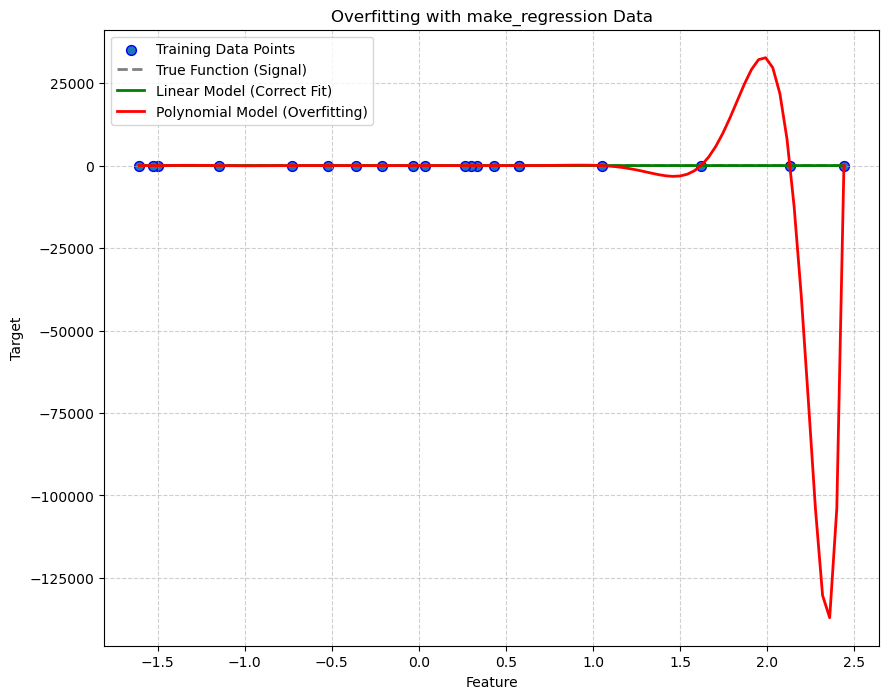

In [18]:
# Visualize the results
X_plot = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]

plt.figure(figsize=(10, 8))
# Plot the original data points
plt.scatter(X, y, edgecolor='b', s=50, label="Training Data Points")
# Plot the true underlying function (a line with the known coefficient)
plt.plot(X_plot, X_plot * true_coefficient, color='gray', linestyle='--', linewidth=2, label="True Function (Signal)")
# Plot the linear model's predictions
plt.plot(X_plot, linear_model.predict(X_plot), color='green', linewidth=2, label="Linear Model (Correct Fit)")
# Plot the polynomial model's predictions
plt.plot(X_plot, polynomial_model.predict(X_plot), color='red', linewidth=2, label="Polynomial Model (Overfitting)")

plt.title("Overfitting with make_regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 6. Evaluation
Accurately evaluating a model's performance is crucial, but it is not a simple task. Although we optimize a model to minimize a loss function on the training data, its strong performance on that set often does not represent its true performance on new data.

#### 6.1 Generalization

For example, when we compare the performance of the two models above on the training set, we can see that the higher-order model fits the training data better.

In [19]:
# Generate testing data
X_test = np.random.randn(100, 1)
y_test = X_test * true_coefficient

However, the results may be very different if we generate new data using the true underlying function.

In [20]:
# Generate testing data according to the true parameters
print(linear_model.score(X_test, y_test))
print(polynomial_model.score(X_test, y_test))

0.5907782741714495
-6083656492155.539


In [21]:
# Evaluate the models


#### 6.2 Train/Test Split

Since the true data distribution is generally unknown in machine learning, a train/test split is used to separate the data. This allows us to verify the model's generalization performance on the test data after training on the training data.

In [22]:

X, y, true_coefficient = make_regression(
    n_samples = 100,
    n_features = 3,
    noise = 5,
    coef = True
)

# Create training and testing data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42,
)

print(X_train.shape, X_test.shape)

(80, 3) (20, 3)


In this way, we can conduct a full training and testing procedure.

In [23]:
# Train the models on training data
linear_model.fit(X_train, y_train)
polynomial_model.fit(X_train, y_train)

# Test the models on testing data
print(linear_model.score(X_test, y_test))
print(polynomial_model.score(X_test, y_test))


0.9975396873912937
-132385236.2736809


#### 6.3 Cross Validation

While a train/test split is a great starting point, it's often not robust enough for reporting final results for a few key reasons.

- Unrepresentative Split: Your single test set is just a subset of your available data. A random split might get "lucky" and not accurately represent the overall data distribution, leading to misleading performance metrics.

- Hyperparameter Tuning: You might unintentionally choose hyperparameters that perform best on your specific test set. This means your model is overfitted to that test data and won't generalize well to new, unseen data.

Because of these issues, cross-validation has become the standard and more reliable method for evaluating a model's true performance. It helps ensure that your results are more stable and less dependent on the luck of a single data split.

In [29]:
# Create a dataset
X, y, true_coefficient = make_regression(
    n_samples=2000,
    n_features=1,
    noise=5,
    coef=True
)

In [30]:
# Define the model
model = LinearRegression()

In [32]:
# Set up k-fold cross validation
from sklearn.model_selection import KFold
n_split = 5
Kf = KFold(n_splits=n_split, shuffle=True)

In [46]:
# Create a full cross-validation loop
from sklearn.metrics import mean_absolute_error

mae_score = []
fold_number = 1

for train_idx, test_idx in Kf.split(X):
    # Generate training and testing datasets
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Fit the model to the new data
    model.fit(X_train, y_train)

    # Make predictions
    preds = model.predict(X_test)

    # Calculate our MAE value
    mae = mean_absolute_error(y_test, preds)
    mae_score.append(mae)

    print(f"MAE at iteration {fold_number} is {mae}")

    fold_number += 1

MAE at iteration 1 is 4.051635558514329
MAE at iteration 2 is 4.074154085436633
MAE at iteration 3 is 3.591722647619734
MAE at iteration 4 is 3.7946630733126097
MAE at iteration 5 is 4.1105539083964935


We can evaluate the model's performance using the average Mean Absolute Error (MAE) from a five-fold cross-validation. This method provides a more reliable evaluation because it utilizes all available data. We will later discuss using a nested cross-validation for a train-validation-test split.

### 7. Standardization, Normalization, and Regularization

Standardization is a data preprocessing technique used in machine learning and statistics to transform features to be on a similar scale. It rescales the data to have a **mean ($\mu$) of 0** and a **standard deviation ($\sigma$) of 1**. This is achieved by subtracting the mean of the feature from each data point ($x$) and then dividing by the standard deviation: $z = (x - \mu) / \sigma$. This resulting value, known as a **z-score**, represents the number of standard deviations a data point is from the mean. The primary benefit of standardization is that it prevents features with larger scales from dominating those with smaller scales in algorithms that are sensitive to feature magnitudes, such as support vector machines (SVMs), principal component analysis (PCA), and gradient-based optimization methods. By putting all features on a common scale, standardization helps these algorithms converge faster and perform more effectively. ⚖️

#### 7.1 Standardization

`sklearn` provides strong support for data preprocessing. For standardization, the `StandardScaler` is quite convinient. First, let's generate the dataset.


In [62]:
# Create a dataset
X, y, true_coefficient = make_regression(
    n_samples=100,
    n_features=3,
    noise=5,
    coef=True
)

print(X[:4])
print(np.mean(X, axis=0))

[[-2.25089865 -0.83594424 -0.4606569 ]
 [-0.49902315 -0.25348872 -0.72856865]
 [ 0.06848923  1.80958867 -0.4768662 ]
 [-1.28070391  0.65152494 -0.14536692]]
[ 0.16893408  0.06071499 -0.14799111]


Then, we can perform standardization on the generated data.

In [66]:
# Perform standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standaardize our data
X_std = scaler.fit_transform(X)

print(np.mean(X_std, axis=0))
print(X_std[:4, :])

[4.44089210e-17 4.23272528e-17 9.99200722e-18]
[[-2.72992883 -1.01728226 -0.37115132]
 [-0.75355444 -0.35647194 -0.68917715]
 [-0.11331663  1.98414081 -0.39039264]
 [-1.63540583  0.67028863  0.00311505]]


You will notice that after standarization, the variables in the data follows normal distribution.

#### 7.2 Normalization



Normalization is a data preprocessing technique that scales numerical features to a fixed range, most commonly between 0 and 1. This method is also known as min-max scaling. The transformation is performed by subtracting the minimum value ($X_
{min}$) from each data point ($X$) and then dividing by the total range of the feature ($X_{max}-X_{min}$): $X_{norm}=(X-X_{min})/(X_{max}-X_{min}$). Normalization is especially useful for algorithms that don't assume a specific distribution of the data, such as k-nearest neighbors (KNN) and neural networks, as it ensures all features contribute more equally to the result. Unlike standardization, normalization is sensitive to outliers because the minimum and maximum values directly dictate the scaled range.

`sklearn` provides robust support for normalization, primarily through the `MinMaxScaler` class found in its `preprocessing` module.

In [67]:
# Perform normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

print(np.mean(X_norm, axis=0))

[0.47238923 0.56255598 0.46248243]


#### 7.3 Ridge Regression

The idea of regularization is to add a penalty to the original loss function. For a brief understanding, we present the loss function of linear regression.  The standard loss function for linear regression is the Mean Squared Error (MSE). The loss reflects the average squared difference between the model's predictions and the actual data.

$$
J(\theta) = \frac{1}{2n}Σ_{i=1}^n(y_i -\hat{y_i})^2
$$

If you don't take the average of the loss, you will get the residual sum of squares (RSS).
$$
RSS = Σ_{i=1}^n(y_i -\hat{y_i})^2
$$

The `ridge` regression adds a penalty that is is a tuning hyperparameter multiplied by the squared sum of all coefficients to the loss function, as follows:
$$
J(\theta) = \frac{1}{2n}Σ_{i=1}^n(y_i -\hat{y_i})^2 + \lambda\Sigma_{j=1}^n\hat{\beta_j}^2
$$

In [ ]:
# Use Ridge regression in sklearn
from sklearn.linear_model import Ridge, LinearRegression, Lasso

regression_ridge = Ridge(alpha=0.5)
model_ridge = regression_ridge.fit(X_std, y)
print(model_ridge.score(X_std, y))

0.9933124211093093


#### 7.4 Lasso Regression

Lasso regression, on the other hand, add L1 regularization to the loss, which lead to:
$$
J(\theta) = \frac{1}{2n}Σ_{i=1}^n(y_i -\hat{y_i})^2 + \lambda\Sigma_{j=1}^n|\hat{\beta_j}|
$$

In [88]:
# Use Lasso regression in sklearn
regression_lasso = Lasso(alpha=0.5)
model_lasso = regression_lasso.fit(X_std, y)
print(model_lasso.score(X_std, y))

regression_linear = LinearRegression()
model_linear = regression_linear.fit(X_std, y)

0.9931168095726196


Ridge (L2 regularization) and Lasso (L1 regularization) yield distinct outcomes. Intuitively, ridge regression does not force coefficients to be exactly zero, but rather shrinks the magnitude of each coefficient. In contrast, lasso regression performs a function analogous to feature selection by setting the coefficients of irrelevant features to zero.

In [ ]:
# Print the coefficients in both models
print(model_lasso.coef_)
print(model_ridge.coef_)
print(model_linear.coef_)

[ 8.84997126 19.44389271 55.65077452]
[ 9.25335487 19.98502073 56.12923882]


NameError: name 'model_lienar' is not defined